In [26]:
import json
import numpy as np
import matplotlib.pyplot as plt
import os
os.getcwd()

'/home/stefan_balauca/llm-adv/WildBench'

In [27]:
steps = [i for i in range(15,760,75)] + [760]

In [28]:
all_results = {}
all_session_ids = {}
for idx in [1,2,3]:
    all_results[idx] = {}
    for step in steps:
        path = f"./eval_results/v2.0625/score.v2/eval=gpt-4o-2024-05-13/adv_{idx}_{step}.json"
        all_results[idx][step] = json.load(open(os.path.join(os.getcwd(), path)))
        if not all_session_ids:
            all_session_ids = {res["session_id"]:i for i,res in enumerate(all_results[idx][step])}
        
    print([len(all_results[idx][step])-256 for step in steps])
print(steps)
print(all_session_ids)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0]
[-1, 0, -2, 0, 0, 0, 0, 0, 0, 0, 0]
[15, 90, 165, 240, 315, 390, 465, 540, 615, 690, 760]
{'ae006110bb364606': 0, 'f4b525741dd84c5b': 1, 'c21e31fe2be34a07': 2, '79ea43d95bd74d10': 3, 'b54d18230c574c8c': 4, '12437b66e1da4ff3': 5, '9caaa9607ccb4ce9': 6, '7d90492c15d644fa': 7, 'd954c583ad3e44f4': 8, '40dad6bf7e5d49d2': 9, 'd908e9ccebdc48f7': 10, '0ee82e21221841b5': 11, '262dbaf51ae648e0': 12, '5379d26e450b4f2b': 13, 'bc1116cf79324c28': 14, '2ef7fdac760c48f9': 15, '443a5245232d4572': 16, '06e633bbb83f4ce0': 17, '096fab31a97840a3': 18, 'fb0b52b74f8e479d': 19, '2c634e26f2624466': 20, '5b2a596534844a3b': 21, '1302c09f1e1f490a': 22, '9eb9dbeccafd4de4': 23, 'a615cce379ca45d0': 24, '3098a99f0ee747d3': 25, '84181315dd814eb1': 26, '604280185ae040c9': 27, 'a5c79c339d544981': 28, '3bbeceb375e94375': 29, '03fa2a7cd8a240db': 30, '8e302975eaf444e8': 31, '5868b9c60c5f4dda': 32, 'f9c8393f98e348b1': 33, '87b1e6125bb240ca': 34, '49fa0e9b3

In [29]:
def read_jsonl(file):
    with open(file, 'r') as f:
        return [json.loads(l) for l in f]

In [32]:
idx, step = 2, 690
for idx in [1,2,3]:
    for step in steps:

        # resp_path = f'/home/stefan_balauca/llm-adv/WildBench/result_dirs/wild_bench_v2/adv_{idx}_{step}.json'
        # resp_path = f'/home/stefan_balauca/llm-adv/WildBench/eval_results/v2.0625/score.v2/eval=gpt-4o-2024-05-13/adv_{idx}_{step}.batch-submit.jsonl'
        # resp_path = f'/home/stefan_balauca/llm-adv/WildBench/eval_results/v2.0625/score.v2/eval=gpt-4o-2024-05-13/adv_{idx}_{step}.batch_results.jsonl'
        resp_path = f'/home/stefan_balauca/llm-adv/WildBench/eval_results/v2.0625/score.v2/eval=gpt-4o-2024-05-13/adv_{idx}_{step}.json'
        # responses = read_jsonl(resp_path)
        responses = json.load(open(resp_path))
        # print(256-len(responses))
        if len(responses) < 256:
            print(f"rm {resp_path}")

rm /home/stefan_balauca/llm-adv/WildBench/eval_results/v2.0625/score.v2/eval=gpt-4o-2024-05-13/adv_2_690.json
rm /home/stefan_balauca/llm-adv/WildBench/eval_results/v2.0625/score.v2/eval=gpt-4o-2024-05-13/adv_3_15.json
rm /home/stefan_balauca/llm-adv/WildBench/eval_results/v2.0625/score.v2/eval=gpt-4o-2024-05-13/adv_3_165.json


In [33]:
base_model_path = "./eval_results/v2.0625/score.v2/eval=gpt-4o-2024-05-13/zephyr-base.json"
base_model_results = json.load(open(os.path.join(os.getcwd(), base_model_path)))
base_model_scores = []
for result in base_model_results:
    base_model_scores.append(int(result["score"]))
print(f"Base model scores: {len(base_model_scores)} {base_model_scores}")
print(f"Base model average score: {np.mean(base_model_scores)}")

Base model scores: 256 [4, 8, 8, 7, 8, 8, 8, 8, 7, 8, 5, 8, 8, 8, 4, 5, 3, 7, 8, 2, 6, 6, 6, 5, 8, 4, 4, 6, 7, 6, 4, 7, 5, 7, 8, 4, 8, 7, 3, 8, 4, 6, 4, 8, 8, 8, 6, 8, 9, 8, 5, 8, 3, 7, 7, 5, 3, 6, 4, 4, 8, 7, 8, 3, 7, 3, 8, 8, 6, 4, 3, 9, 7, 8, 3, 9, 9, 2, 8, 8, 3, 6, 8, 7, 8, 8, 8, 3, 6, 8, 7, 8, 7, 8, 5, 7, 4, 9, 3, 7, 6, 3, 6, 9, 5, 2, 8, 7, 8, 8, 8, 5, 8, 7, 4, 3, 6, 8, 8, 7, 5, 4, 5, 4, 4, 6, 5, 7, 3, 4, 9, 7, 7, 6, 4, 6, 8, 7, 3, 5, 5, 3, 8, 6, 2, 4, 6, 8, 4, 7, 2, 6, 5, 7, 5, 4, 5, 5, 8, 1, 7, 9, 4, 8, 5, 8, 5, 8, 6, 4, 7, 6, 7, 3, 8, 6, 3, 6, 8, 3, 5, 6, 4, 7, 3, 5, 4, 8, 5, 8, 4, 8, 7, 6, 4, 8, 8, 8, 7, 9, 7, 8, 8, 6, 8, 8, 8, 7, 5, 4, 8, 8, 7, 3, 2, 8, 6, 7, 8, 3, 6, 6, 8, 8, 7, 8, 7, 7, 8, 3, 7, 4, 8, 7, 8, 5, 8, 8, 4, 8, 8, 4, 3, 4, 7, 8, 4, 8, 8, 8, 8, 8, 7, 8, 7, 4]
Base model average score: 6.16796875


In [65]:
base_model_path = "./eval_results/v2.0625/score.v2/eval=gpt-4o-2024-05-13/zephyr-cat.json"
base_model_results = json.load(open(os.path.join(os.getcwd(), base_model_path)))
base_model_scores = []
for result in base_model_results:
    base_model_scores.append(int(result["score"]))
print(f"Base model scores: {len(base_model_scores)} {base_model_scores}")
print(f"Base model average score: {np.mean(base_model_scores)}")

Base model scores: 256 [1, 8, 7, 5, 8, 8, 7, 8, 7, 7, 5, 5, 7, 7, 3, 4, 3, 4, 7, 2, 5, 6, 4, 5, 8, 4, 5, 6, 7, 4, 4, 5, 4, 8, 8, 5, 4, 5, 4, 8, 4, 5, 1, 2, 8, 6, 5, 6, 8, 8, 4, 2, 6, 5, 4, 1, 3, 7, 6, 6, 8, 8, 3, 4, 8, 2, 8, 3, 1, 5, 4, 9, 1, 8, 3, 9, 8, 7, 7, 6, 2, 2, 8, 7, 8, 8, 5, 3, 6, 5, 7, 8, 4, 8, 2, 4, 5, 9, 4, 8, 6, 3, 3, 1, 4, 3, 7, 7, 8, 2, 7, 4, 6, 7, 3, 3, 8, 6, 8, 1, 7, 4, 6, 3, 5, 8, 5, 2, 2, 4, 8, 6, 5, 7, 4, 6, 5, 8, 4, 5, 3, 3, 8, 6, 3, 4, 4, 8, 4, 6, 2, 5, 3, 6, 6, 5, 7, 3, 8, 5, 6, 9, 7, 8, 4, 6, 3, 7, 5, 5, 6, 6, 3, 3, 7, 8, 5, 6, 8, 3, 4, 8, 6, 6, 2, 4, 5, 5, 6, 6, 3, 6, 1, 4, 5, 7, 4, 3, 4, 4, 6, 7, 8, 5, 8, 8, 8, 6, 5, 6, 7, 8, 5, 3, 2, 8, 7, 4, 5, 4, 4, 6, 8, 7, 7, 7, 1, 5, 5, 4, 8, 1, 8, 7, 7, 2, 8, 8, 8, 6, 8, 4, 3, 4, 7, 8, 5, 8, 8, 8, 5, 6, 6, 6, 1, 5]
Base model average score: 5.39453125


In [34]:
temp_results = {}
for rs in [1, 2, 3, 4, 5]:
    temp_model_path = f"./eval_results/v2.0625/score.v2/eval=gpt-4o-2024-05-13/zephyr-base-t07-r{rs}.json"
    temp_model_results = json.load(open(os.path.join(os.getcwd(), temp_model_path)))
    temp_model_scores = []
    for result in temp_model_results:
        temp_model_scores.append(int(result["score"]))
    temp_results[rs] = temp_model_scores
    # print(f"Base model scores: {len(temp_model_scores)} {temp_model_scores}")
    print(f"Base model average score: {np.mean(temp_model_scores)}")

Base model average score: 6.24609375
Base model average score: 6.2421875
Base model average score: 6.08984375
Base model average score: 6.1328125
Base model average score: 6.15625


In [45]:
random_results = np.array(list(temp_results.values()))
scores_temp_mean = np.mean(random_results, axis=0)
scores_temp_std = np.std(random_results, axis=0)
print(scores_temp_mean.tolist())
print(scores_temp_std.tolist())

[4.2, 8.0, 8.0, 7.4, 8.0, 8.0, 6.2, 8.0, 7.0, 8.0, 4.6, 7.2, 7.8, 8.0, 4.4, 5.6, 3.0, 6.6, 7.6, 3.0, 6.6, 4.2, 5.4, 5.0, 7.8, 7.0, 4.6, 6.2, 7.0, 5.6, 4.8, 6.4, 4.2, 8.0, 8.0, 5.0, 6.2, 7.0, 4.2, 8.0, 4.4, 5.8, 6.0, 7.4, 7.4, 6.8, 6.2, 8.2, 8.8, 8.0, 5.6, 8.0, 3.4, 6.6, 7.6, 5.6, 3.4, 6.6, 4.6, 4.4, 8.0, 7.6, 8.0, 3.2, 7.6, 3.2, 7.0, 8.2, 6.8, 4.4, 3.8, 9.0, 6.0, 8.8, 3.0, 9.0, 9.0, 3.8, 8.0, 7.4, 3.4, 7.0, 8.0, 7.2, 8.0, 7.4, 7.0, 3.0, 5.4, 7.6, 6.6, 7.6, 6.2, 8.0, 4.8, 7.0, 3.8, 8.8, 3.4, 6.8, 5.8, 3.2, 6.2, 7.6, 5.6, 2.2, 7.8, 7.6, 7.2, 7.8, 7.8, 5.2, 7.2, 7.0, 3.6, 2.4, 7.2, 7.8, 7.4, 7.8, 5.4, 3.8, 6.2, 3.6, 5.0, 6.0, 6.0, 6.6, 3.0, 4.4, 8.8, 7.0, 6.8, 6.2, 3.6, 7.2, 7.6, 7.4, 4.0, 4.6, 4.6, 5.2, 8.0, 5.2, 2.0, 4.2, 4.2, 8.6, 5.2, 6.2, 2.8, 6.0, 4.4, 7.0, 6.8, 4.2, 5.4, 5.4, 8.4, 2.6, 6.6, 9.0, 4.8, 6.8, 4.4, 8.0, 3.8, 7.4, 6.8, 6.0, 8.0, 5.6, 5.2, 3.0, 8.0, 6.6, 3.6, 6.0, 7.8, 3.0, 5.4, 6.4, 4.6, 7.0, 3.0, 5.8, 5.0, 7.4, 4.2, 7.6, 3.8, 8.0, 7.0, 5.8, 5.0, 6.8, 5.2, 8.0, 6.2, 8.0,

(array([68.,  0., 97., 12., 38., 15.,  9., 10.,  2.,  5.]),
 array([0.        , 0.17435596, 0.34871192, 0.52306787, 0.69742383,
        0.87177979, 1.04613575, 1.2204917 , 1.39484766, 1.56920362,
        1.74355958]),
 <BarContainer object of 10 artists>)

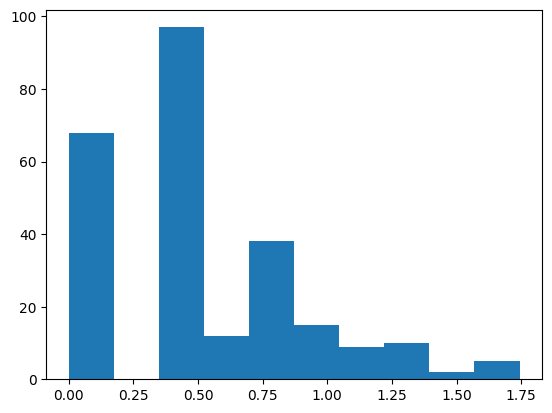

In [47]:
plt.hist(scores_temp_std)

In [48]:
all_scores = {}
mean_scores = {}
for idx in [1,2,3]:
    all_scores[idx] = {}
    mean_scores[idx] = {}
    for step in steps:
        scores = []
        # for result in all_results[idx][step]:
        for sid in all_session_ids:
            found = False
            for result in all_results[idx][step]:
                if result['session_id'] == sid:
                    found = True
                    break
            if found:
                scores.append(int(result['score']))
            else:
                scores.append(5)
        all_scores[idx][step] = scores
        mean_scores[idx][step] = np.mean(scores)
# for result in all_results[1][15]:
#     scores.append(int(result['score']))

print(mean_scores)



{1: {15: 5.19140625, 90: 5.17578125, 165: 5.578125, 240: 5.12890625, 315: 5.34765625, 390: 5.265625, 465: 5.26953125, 540: 5.3125, 615: 5.3203125, 690: 5.15625, 760: 5.14453125}, 2: {15: 5.27734375, 90: 5.11328125, 165: 5.19921875, 240: 5.31640625, 315: 5.3515625, 390: 5.234375, 465: 5.37890625, 540: 5.19140625, 615: 5.3203125, 690: 5.203125, 760: 5.19921875}, 3: {15: 5.234375, 90: 5.46484375, 165: 5.40625, 240: 5.24609375, 315: 5.34375, 390: 5.36328125, 465: 5.46875, 540: 5.20703125, 615: 5.2734375, 690: 5.2734375, 760: 5.24609375}}


68
6.852941176470588
[8, 8, 8, 8, 8, 7, 8, 8, 3, 3, 8, 8, 5, 7, 8, 8, 8, 8, 8, 9, 6, 3, 9, 9, 8, 8, 8, 3, 8, 7, 7, 5, 3, 7, 4, 8, 2, 6, 7, 9, 8, 8, 3, 8, 6, 3, 7, 3, 8, 7, 8, 8, 8, 6, 7, 8, 8, 3, 8, 7, 7, 8, 7, 8, 8, 8, 8, 7]
[9, 8, 8, 7, 8, 5, 8, 7, 2, 3, 7, 6, 4, 6, 8, 8, 8, 8, 2, 9, 4, 2, 8, 8, 7, 8, 8, 3, 8, 4, 6, 5, 3, 7, 4, 8, 2, 4, 6, 7, 6, 6, 3, 7, 4, 3, 5, 2, 6, 1, 7, 6, 4, 5, 5, 8, 7, 1, 8, 5, 6, 7, 1, 8, 8, 8, 8, 6]
[9, 8, 7, 8, 8, 7, 7, 7, 2, 2, 8, 8, 4, 6, 8, 7, 8, 8, 2, 9, 5, 4, 7, 7, 7, 8, 6, 3, 8, 2, 6, 4, 3, 7, 4, 8, 2, 6, 7, 7, 6, 7, 2, 7, 5, 3, 6, 2, 7, 1, 7, 5, 7, 5, 7, 7, 7, 1, 8, 7, 6, 7, 3, 8, 8, 7, 6, 2]
[9, 5, 7, 8, 8, 7, 7, 7, 2, 2, 8, 8, 4, 6, 8, 8, 8, 8, 6, 9, 6, 3, 8, 7, 7, 8, 6, 2, 8, 4, 6, 4, 3, 6, 4, 8, 2, 6, 6, 8, 6, 8, 3, 7, 4, 3, 7, 2, 6, 6, 8, 4, 6, 5, 7, 6, 8, 3, 8, 7, 7, 8, 6, 8, 7, 7, 7, 7]
[9, 7, 7, 8, 8, 7, 7, 6, 2, 2, 7, 8, 4, 6, 8, 8, 2, 8, 2, 9, 1, 3, 8, 8, 6, 8, 8, 3, 7, 4, 7, 4, 3, 6, 4, 8, 2, 5, 6, 8, 7, 8, 3, 7, 6, 4, 7, 2, 7, 1, 8, 6, 6,

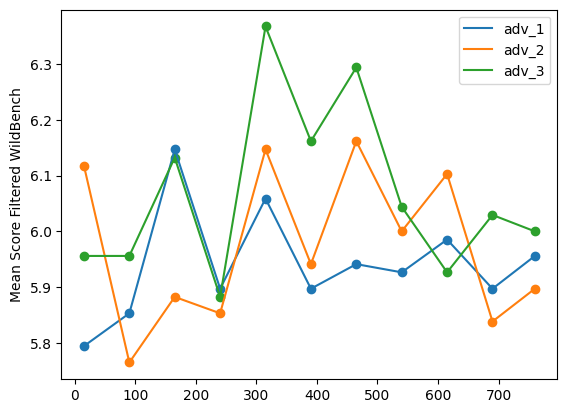

In [53]:
filtered = scores_temp_std < 0.1
print(np.sum(filtered))
print(np.mean(scores_temp_mean[filtered]))
print(scores_temp_mean[filtered].astype(np.int64).tolist())
mean_scores_filtered = {}
for idx in [1,2,3]:
    mean_scores_filtered[idx] = {}
    for step in steps:
        mean_scores_filtered[idx][step] = np.mean(np.array(all_scores[idx][step])[filtered])
        print(np.array(all_scores[idx][step])[filtered].tolist())

print(mean_scores_filtered)
# plot scores for each index over the steps
for idx in [1,2,3]:
    plt.plot(steps, [mean_scores_filtered[idx][step] for step in steps], label=f"adv_{idx}",c=f'C{idx-1}')
    plt.scatter(steps, [mean_scores_filtered[idx][step] for step in steps],c=f'C{idx-1}')
plt.ylabel("Mean Score Filtered WildBench")
plt.legend()

In [39]:
print(base_model_scores)
print(all_scores[1][15])
print(all_scores[2][15])

[4, 8, 8, 7, 8, 8, 8, 8, 7, 8, 5, 8, 8, 8, 4, 5, 3, 7, 8, 2, 6, 6, 6, 5, 8, 4, 4, 6, 7, 6, 4, 7, 5, 7, 8, 4, 8, 7, 3, 8, 4, 6, 4, 8, 8, 8, 6, 8, 9, 8, 5, 8, 3, 7, 7, 5, 3, 6, 4, 4, 8, 7, 8, 3, 7, 3, 8, 8, 6, 4, 3, 9, 7, 8, 3, 9, 9, 2, 8, 8, 3, 6, 8, 7, 8, 8, 8, 3, 6, 8, 7, 8, 7, 8, 5, 7, 4, 9, 3, 7, 6, 3, 6, 9, 5, 2, 8, 7, 8, 8, 8, 5, 8, 7, 4, 3, 6, 8, 8, 7, 5, 4, 5, 4, 4, 6, 5, 7, 3, 4, 9, 7, 7, 6, 4, 6, 8, 7, 3, 5, 5, 3, 8, 6, 2, 4, 6, 8, 4, 7, 2, 6, 5, 7, 5, 4, 5, 5, 8, 1, 7, 9, 4, 8, 5, 8, 5, 8, 6, 4, 7, 6, 7, 3, 8, 6, 3, 6, 8, 3, 5, 6, 4, 7, 3, 5, 4, 8, 5, 8, 4, 8, 7, 6, 4, 8, 8, 8, 7, 9, 7, 8, 8, 6, 8, 8, 8, 7, 5, 4, 8, 8, 7, 3, 2, 8, 6, 7, 8, 3, 6, 6, 8, 8, 7, 8, 7, 7, 8, 3, 7, 4, 8, 7, 8, 5, 8, 8, 4, 8, 8, 4, 3, 4, 7, 8, 4, 8, 8, 8, 8, 8, 7, 8, 7, 4]
[2, 9, 8, 7, 8, 7, 5, 8, 5, 8, 5, 6, 7, 7, 3, 7, 2, 5, 8, 3, 6, 4, 4, 5, 8, 5, 4, 7, 6, 4, 4, 4, 3, 7, 6, 4, 2, 6, 3, 8, 7, 4, 5, 2, 8, 7, 6, 8, 8, 8, 8, 8, 4, 6, 5, 1, 5, 4, 7, 3, 8, 7, 2, 4, 7, 2, 8, 3, 6, 4, 2, 9, 4, 8, 2, 8, 8,

In [56]:
filtered_session_ids = {sid for sid in all_session_ids if scores_temp_std[all_session_ids[sid]] < 0.1}
print(len(filtered_session_ids))

68


In [61]:
all_scores_filtered = {}
mean_scores_filtered = {}
denied_responses = {}
for idx in [1,2,3]:
    all_scores_filtered[idx] = {}
    mean_scores_filtered[idx] = {}
    denied_responses[idx] = {}
    for step in steps:
        scores = []
        denied = 0
        for result in all_results[idx][step]:
            # if result["session_id"] not in filtered_session_ids: continue
            if "sorry" in result['model_output'].lower(): 
                denied += 1
                continue
            scores.append(int(result['score']))
        all_scores_filtered[idx][step] = scores
        denied_responses[idx][step] = denied
        mean_scores_filtered[idx][step] = np.mean(scores)
# for result in all_results[1][15]:
#     scores.append(int(result['score']))

# mean_scores_filtered
print(denied_responses)


{1: {15: 21, 90: 17, 165: 3, 240: 32, 315: 26, 390: 29, 465: 25, 540: 24, 615: 24, 690: 24, 760: 24}, 2: {15: 14, 90: 23, 165: 33, 240: 13, 315: 11, 390: 23, 465: 18, 540: 18, 615: 19, 690: 19, 760: 19}, 3: {15: 25, 90: 8, 165: 15, 240: 20, 315: 16, 390: 19, 465: 13, 540: 21, 615: 22, 690: 22, 760: 23}}


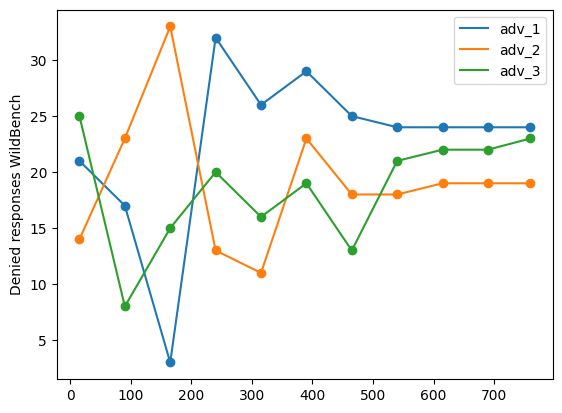

In [62]:
# plot scores for each index over the steps
for idx in [1,2,3]:
    plt.plot(steps, [denied_responses[idx][step] for step in steps], label=f"adv_{idx}",c=f'C{idx-1}')
    plt.scatter(steps, [denied_responses[idx][step] for step in steps],c=f'C{idx-1}')
plt.ylabel("Denied responses WildBench")
plt.legend()

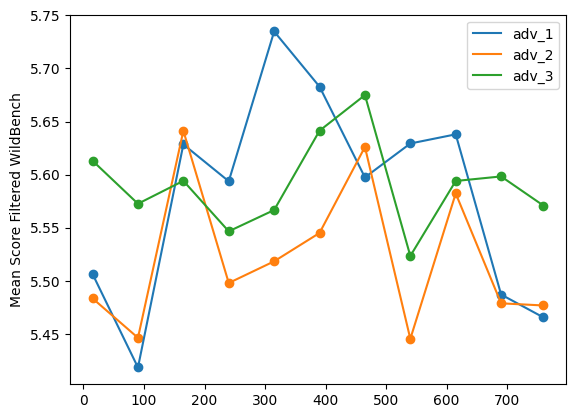

In [63]:
# plot scores for each index over the steps
for idx in [1,2,3]:
    plt.plot(steps, [mean_scores_filtered[idx][step] for step in steps], label=f"adv_{idx}",c=f'C{idx-1}')
    plt.scatter(steps, [mean_scores_filtered[idx][step] for step in steps],c=f'C{idx-1}')
plt.ylabel("Mean Score Filtered WildBench")
plt.legend()

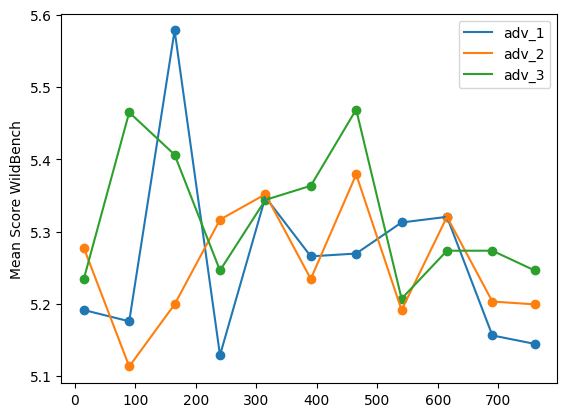

In [66]:
# plot scores for each index over the steps
for idx in [1,2,3]:
    plt.plot(steps, [mean_scores[idx][step] for step in steps], label=f"adv_{idx}",c=f'C{idx-1}')
    plt.scatter(steps, [mean_scores[idx][step] for step in steps],c=f'C{idx-1}')
plt.ylabel("Mean Score WildBench")
plt.legend()